In [1]:
test_input = """???.### 1,1,3
.??..??...?##. 1,1,3
?#?#?#?#?#?#?#? 1,3,1,6
????.#...#... 4,1,1
????.######..#####. 1,6,5
?###???????? 3,2,1"""

In [2]:
input = open("inputs/12").read()

In [3]:
springs = []

# for l in test_input.splitlines():
for l in input.splitlines():
    sn, nums = l.split()

    # springs.append((list(sn), [int(n) for n in nums.split(',')]))
    springs.append((sn, tuple(int(n) for n in nums.split(','))))

In [4]:
springs[-1]

('????#.??##??', (3, 1, 3, 1))

In [5]:
ms = []
xs = []

for sn, nums in springs:
    sn = list(sn)
    xs.append(len(nums))

    ms.append(sum(s == '?' for s in sn))

In [6]:
max(ms)

18

In [7]:
len(ms)

1000

In [8]:
max(xs)

6

<Axes: ylabel='Count'>

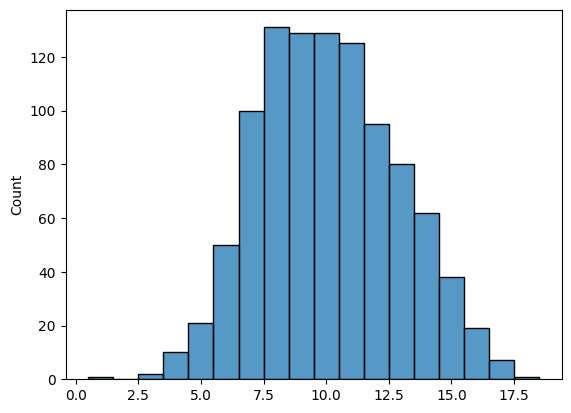

In [9]:
import seaborn as sns
sns.histplot(ms, discrete=True)

<Axes: ylabel='Count'>

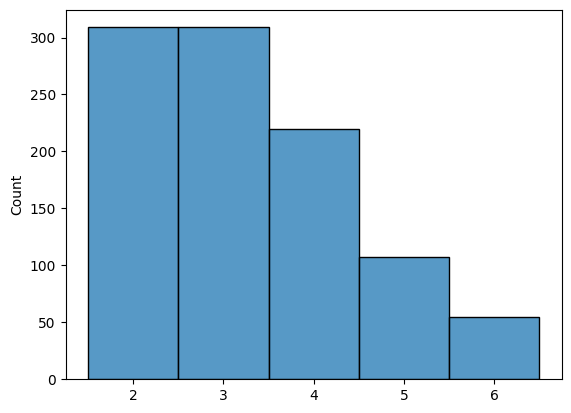

In [10]:
import seaborn as sns
sns.histplot(xs, discrete=True)

In [11]:
2**18

262144

In [12]:
test_str = '#....######..#####.'

In [13]:
def get_contiguous_blocks(str):
    return tuple(len(s) for s in str.split('.') if s)

In [14]:
def get_idxs(s, char='?'):
    return [i for i, c in enumerate(s) if c == char]

In [15]:
len('??????????????')

14

In [16]:
import itertools

options = ('#', '.')

def bruteforce_possibilities(s, nums):
    test_idxs = get_idxs(s)

    sm = 0
    for cs in itertools.product(options, repeat=len(test_idxs)):
        new_str = list(s)

        for i, c in zip(test_idxs, cs):
            new_str[i] = c
        
        blocks = get_contiguous_blocks(''.join(new_str))

        if blocks == nums:
            sm += 1
    
    return sm

In [17]:
from tqdm import tqdm

sm = 0
for s, nums in tqdm(springs):
    sm += bruteforce_possibilities(s, nums)

100%|██████████| 1000/1000 [00:08<00:00, 113.74it/s]


In [18]:
sm

7622

In [19]:
BRUTEFORCE_THRESHOLD = 10

In [20]:
from functools import lru_cache

@lru_cache(maxsize=100_000_000)
def count_possibilities(s, nums):
    # print(s, nums)
    question_idxs = get_idxs(s, char='?')

    case = None
    if len(question_idxs) < 8:
        # print("Short, bruteforcing")
        return bruteforce_possibilities(s, nums)
    else:
        dot_idxs = get_idxs(s, char='.')

        if len(dot_idxs) == 0:
            case = 1
            # print('case 1')
            sm = 0

            split_question_idx = min((abs(i - len(s)//2), i) for i in question_idxs)[1]

            for option in options:
                new_s = list(s)
                new_s[split_question_idx] = option

                sm += count_possibilities(''.join(new_s), nums)
        else:
            # print('case 2')
            case = 2
            # choose the dot closest to the middle and then recurse
            split_dot_idx = min((abs(i - len(s)//2), i) for i in dot_idxs)[1]

            left_s = s[:split_dot_idx]
            right_s = s[split_dot_idx+1:]

            sm = 0

            for i in range(len(nums)+1):
                sm += count_possibilities(left_s, nums[:i]) * count_possibilities(right_s, nums[i:])
            
        
        # real_answer = bruteforce_possibilities(s, nums)

        # if sm != real_answer:
        #     print(f"Returning {sm} with string {s} and nums {nums} which triggered case {case}. Real answer: {real_answer}")
        return sm

In [21]:
from tqdm import tqdm

sm = 0
for s, nums in tqdm(springs):
    sm += count_possibilities(s, nums)

100%|██████████| 1000/1000 [00:00<00:00, 1018.22it/s]


In [22]:
count_possibilities.cache_info()

CacheInfo(hits=17425, misses=23367, maxsize=100000000, currsize=23367)

In [23]:
sm

7622

In [24]:
from tqdm import tqdm

# 12 min with bruteforce at 3

sm = 0
for s, nums in tqdm(springs):
    new_s = "?".join([s] * 5)
    new_nums = nums * 5

    sm += count_possibilities(new_s, new_nums)

100%|██████████| 1000/1000 [15:58<00:00,  1.04it/s] 


In [25]:
sm

4964259839627